## Data quality check / cleaning / preparation 

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.** An example is given below.

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
import time

### Data quality check
*By Elton John*

The code below visualizes the distribution of all the variables in the dataset, and their association with the response.

In [17]:
continuous = []
for col in movie_industry.columns:
    if movie_industry.dtypes[col] != object:
        continuous.append(col)
continuous        

['year', 'score', 'votes', 'budget', 'gross', 'runtime']

Text(0, 0.5, 'Count')

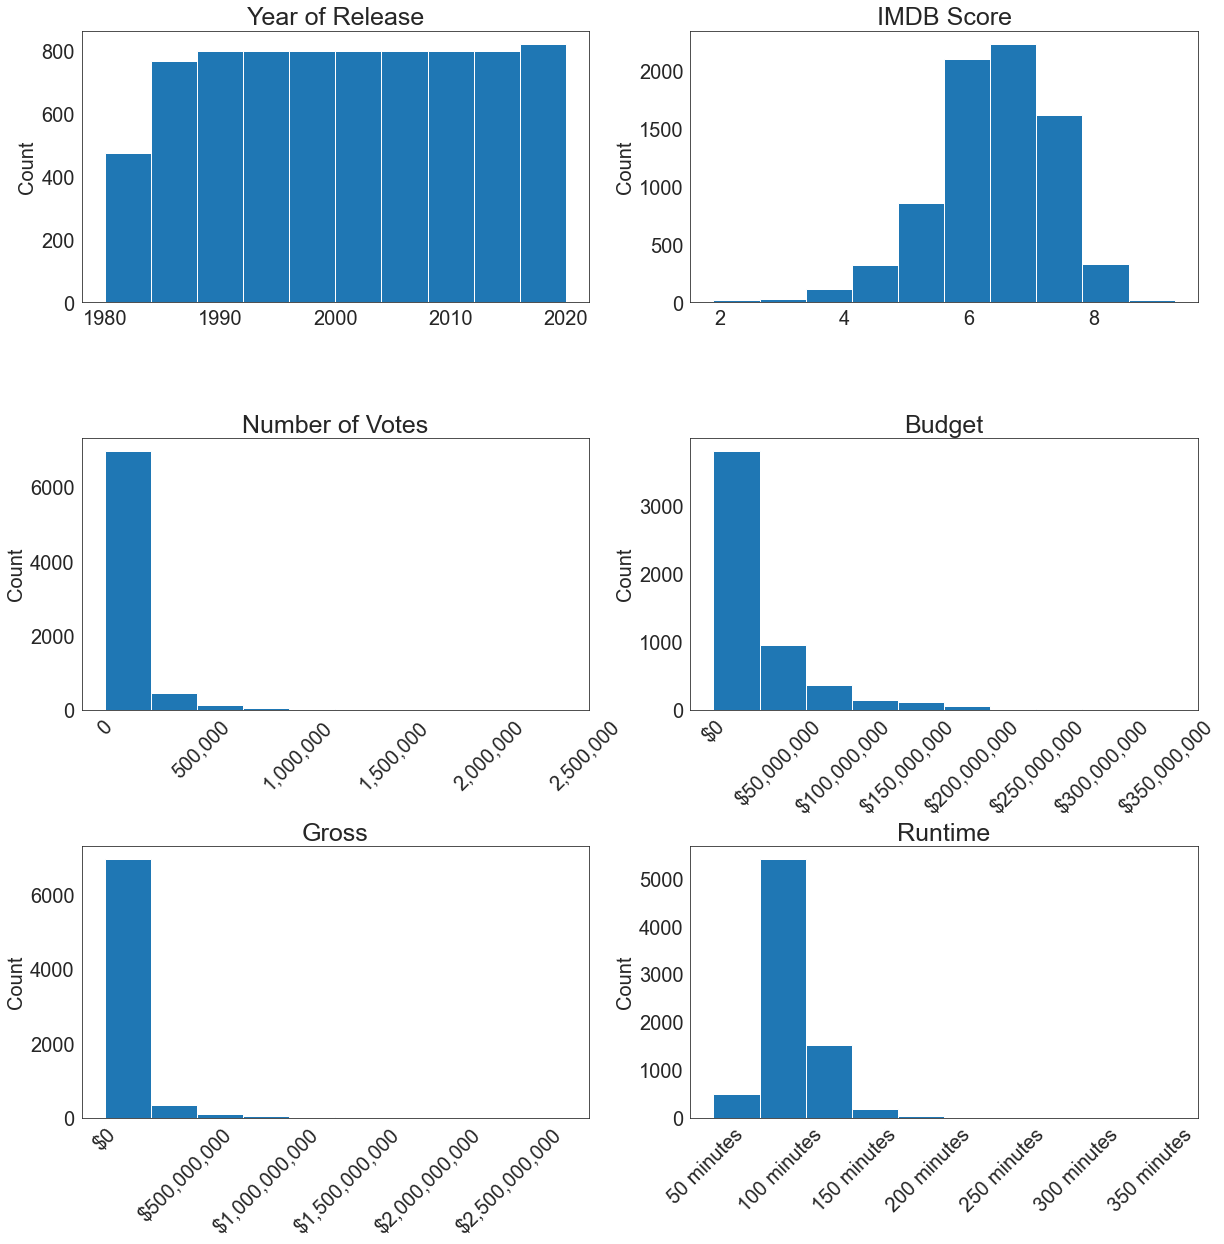

In [93]:
sns.set_style('white')
fig, axes = plt.subplots(3,2,figsize=(20,20))
plt.subplots_adjust(wspace=0.2)
plt.subplots_adjust(hspace=0.5)

axes[0,0].hist(movie_industry.year)
axes[0,0].set_title('Year of Release', fontsize=25)
axes[0,0].tick_params(axis = 'both',labelsize=20)
axes[0,0].set_ylabel('Count', fontsize=20)

axes[0,1].hist(movie_industry.score)
axes[0,1].set_title('IMDB Score', fontsize=25)
axes[0,1].tick_params(axis = 'both',labelsize=20)
axes[0,1].set_ylabel('Count', fontsize=20)


axes[1,0].hist(movie_industry.votes)
axes[1,0].set_title('Number of Votes', fontsize=25)
axes[1,0].tick_params(axis = 'both',labelsize=20)
axes[1,0].xaxis.set_major_formatter('{x:,.0f}')
axes[1,0].tick_params(axis='x', labelrotation=45)
axes[1,0].set_ylabel('Count', fontsize=20)

axes[1,1].hist(movie_industry.budget)
axes[1,1].set_title('Budget', fontsize=25)
axes[1,1].tick_params(axis = 'both',labelsize=20)
axes[1,1].xaxis.set_major_formatter('${x:,.0f}')
axes[1,1].tick_params(axis='x', labelrotation=45)
axes[1,1].set_ylabel('Count', fontsize=20)

axes[2,0].hist(movie_industry.gross)
axes[2,0].set_title('Gross', fontsize=25)
axes[2,0].tick_params(axis = 'both',labelsize=20)
axes[2,0].xaxis.set_major_formatter('${x:,.0f}')
axes[2,0].tick_params(axis='x', labelrotation=45)
axes[2,0].set_ylabel('Count', fontsize=20)


axes[2,1].hist(movie_industry.runtime)
axes[2,1].set_title('Runtime', fontsize=25)
axes[2,1].tick_params(axis = 'both',labelsize=20)
axes[2,1].xaxis.set_major_formatter('{x:.0f} minutes')
axes[2,1].tick_params(axis='x', labelrotation=45)
axes[2,1].set_ylabel('Count', fontsize=20)

In [19]:
categorical = []
for col in movie_industry.columns:
    if movie_industry.dtypes[col] == object:
        categorical.append(col)
categorical        

['name',
 'rating',
 'genre',
 'released',
 'director',
 'writer',
 'star',
 'country',
 'company']

In [ ]:
sns.set_style('white')
fig, axes = plt.subplots(4,2,figsize=(20,20))
plt.subplots_adjust(wspace=0.2)
plt.subplots_adjust(hspace=0.5)

sns.histplot(ax=axes[0,0],x='rating', data = movie_industry)
axes[0,0].set_title('Rating', fontsize=25)
axes[0,0].tick_params(axis = 'both',labelsize=20)
axes[0,0].tick_params(axis='x', labelrotation=45)
axes[0,0].set_ylabel('Count', fontsize=20)

sns.histplot(ax=axes[0,1], x='genre', data = movie_industry)
axes[0,1].set_title('Genre', fontsize=5)
axes[0,1].tick_params(axis = 'both',labelsize=20)
axes[0,1].set_ylabel('Count', fontsize=20)

sns.histplot(ax=axes[1,0], x='released', data = movie_industry)
axes[1,0].set_title('Date of US Release', fontsize=25)
axes[1,0].tick_params(axis = 'both',labelsize=20)
axes[1,0].tick_params(axis='x', labelrotation=45)
axes[1,0].set_ylabel('Count', fontsize=20)

sns.histplot(ax=axes[1,1], x='director', data = movie_industry)
axes[1,1].set_title('Director', fontsize=25)
axes[1,1].tick_params(axis = 'both',labelsize=20)
axes[1,1].tick_params(axis='x', labelrotation=45)
axes[1,1].set_ylabel('Count', fontsize=20)

sns.histplot(ax=axes[2,0], x='writer', data = movie_industry)
axes[2,0].set_title('Writer', fontsize=25)
axes[2,0].tick_params(axis = 'both',labelsize=20)
axes[2,0].tick_params(axis='x', labelrotation=45)
axes[2,0].set_ylabel('Count', fontsize=20)

sns.histplot(ax=axes[2,1], x='star', data = movie_industry)
axes[2,1].set_title('Star', fontsize=25)
axes[2,1].tick_params(axis = 'both',labelsize=20)
axes[2,1].tick_params(axis='x', labelrotation=45)
axes[2,1].set_ylabel('Count', fontsize=20)

sns.histplot(ax=axes[3,0], x='country', data = movie_industry)
axes[3,0].set_title('Production Country', fontsize=25)
axes[3,0].tick_params(axis = 'both',labelsize=20)
axes[3,0].tick_params(axis='x', labelrotation=45)
axes[3,0].set_ylabel('Count', fontsize=20)

sns.histplot(ax=axes[3,1], x='company', data = movie_industry)
axes[3,1].set_title('Production Company', fontsize=25)
axes[3,1].tick_params(axis = 'both',labelsize=20)
axes[3,1].tick_params(axis='x', labelrotation=45)
axes[3,1].set_ylabel('Count', fontsize=20)

KeyboardInterrupt: 

In [106]:
predictors = list(movie_industry.columns)
predictors.remove('gross')
predictors.remove('name')

In [ ]:
#...Association of the response with the predictors...#
sns.pairplot(movie_industry, y_vars=['gross'], x_vars=predictors)

### Data cleaning
*By Lilly Sorkin*

From the data quality check we realized that:
1. After spending several hours working on it, we discovered that our initial dataset was too dificult to clean. It contained a multitude of listed dictionaries that we were unable to extract information from. As such we turned to our da

2. Some of the columns that we were expecting to be highly important were missing values. For example `budget` was missing 2171 values. Since imputing these values would not provide helpful information for our model, we removed all rows with missing values, leaving us with 5421 data points for our model development.

The code below implements the above cleaning.

In [3]:
movie_industry = pd.read_csv('movies.csv')

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [7]:
movie_industry.describe()

year        score         votes        budget         gross  \
count  7668.000000  7665.000000  7.665000e+03  5.497000e+03  7.479000e+03   
mean   2000.405451     6.390411  8.810850e+04  3.558988e+07  7.850054e+07   
std      11.153508     0.968842  1.633238e+05  4.145730e+07  1.657251e+08   
min    1980.000000     1.900000  7.000000e+00  3.000000e+03  3.090000e+02   
25%    1991.000000     5.800000  9.100000e+03  1.000000e+07  4.532056e+06   
50%    2000.000000     6.500000  3.300000e+04  2.050000e+07  2.020576e+07   
75%    2010.000000     7.100000  9.300000e+04  4.500000e+07  7.601669e+07   
max    2020.000000     9.300000  2.400000e+06  3.560000e+08  2.847246e+09   

           runtime  
count  7664.000000  
mean    107.261613  
std      18.581247  
min      55.000000  
25%      95.000000  
50%     104.000000  
75%     116.000000  
max     366.000000

In [8]:
movie_industry.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [49]:
movie_industry_clean = movie_industry.dropna()
movie_industry_clean.reset_index(inplace=True)
movie_industry_clean

index                                            name     rating  \
0         0                                     The Shining          R   
1         1                                 The Blue Lagoon          R   
2         2  Star Wars: Episode V - The Empire Strikes Back         PG   
3         3                                       Airplane!         PG   
4         4                                      Caddyshack          R   
...     ...                                             ...        ...   
5416   7648                               Bad Boys for Life          R   
5417   7649                              Sonic the Hedgehog         PG   
5418   7650                                        Dolittle         PG   
5419   7651                            The Call of the Wild         PG   
5420   7652                               The Eight Hundred  Not Rated   

          genre  year                           released  score      votes  \
0         Drama  1980      June 13, 1980 (United States)    8.4   927000.0   
1     Adventure  1980       July 2, 1980 (United States)    5.8    65000.0   
2        Action  1980      June 20, 1980 (United States)    8.7  1200000.0   
3        Comedy  1980       July 2, 1980 (United States)    7.7   221000.0   
4        Comedy  1980      July 25, 1980 (United States)    7.3   108000.0   
...         ...   ...                                ...    ...        ...   
5416     Action  2020   January 17, 2020 (United States)    6.6   140000.0   
5417     Action  2020  February 14, 2020 (United States)    6.5   102000.0   
5418  Adventure  2020   January 17, 2020 (United States)    5.6    53000.0   
5419  Adventure  2020  February 21, 2020 (United States)    6.8    42000.0   
5420     Action  2020    August 28, 2020 (United States)    6.8     3700.0   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
5416     Adil El Arbi              Peter Craig         Will Smith   
5417      Jeff Fowler                Pat Casey       Ben Schwartz   
5418   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
5419    Chris Sanders            Michael Green      Harrison Ford   
5420          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country       budget        gross  \
0     United Kingdom   19000000.0   46998772.0   
1      United States    4500000.0   58853106.0   
2      United States   18000000.0  538375067.0   
3      United States    3500000.0   83453539.0   
4      United States    6000000.0   39846344.0   
...              ...          ...          ...   
5416   United States   90000000.0  426505244.0   
5417   United States   85000000.0  319715683.0   
5418   United States  175000000.0  245487753.0   
5419          Canada  135000000.0  111105497.0   
5420           China   80000000.0  461421559.0   

                                  company  runtime  
0                            Warner Bros.    146.0  
1                       Columbia Pictures    104.0  
2                               Lucasfilm    124.0  
3                      Paramount Pictures     88.0  
4                          Orion Pictures     98.0  
...                                   ...      ...  
5416                    Columbia Pictures    124.0  
5417                   Paramount Pictures     99.0  
5418                   Universal Pictures    101.0  
5419                 20th Century Studios    100.0  
5420  Beijing Diqi Yinxiang Entertainment    149.0  

[5421 rows x 16 columns]

In [5]:
movie_industry_clean.to_csv('movie_industry_clean.csv')

### Data preparation
*By Sankaranarayanan Balasubramanian and Chun-Li*

The following data preparation steps helped us to prepare our data for implementing various modeling / validation techniques:

1. Since we need to predict house price, we derived some new predictors *(from existing predictors)* that intuitively seem to be helpuful to predict house price. 

2. We have shuffled the dataset to prepare it for K-fold cross validation.

3. We have created a standardized version of the dataset, as we will use it to develop Lasso / Ridge regression models.

In [3]:
######---------------Creating new predictors----------------#########

#Creating number of bedrooms per unit floor area

#Creating ratio of bathrooms to bedrooms

#Creating ratio of carpet area to floor area

In [ ]:
######-----------Shuffling the dataset for K-fold------------#########

In [ ]:
######-----Standardizing the dataset for Lasso / Ridge-------#########

## Exploratory data analysis

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

## Developing the model

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

In [ ]:
We first wanted to visualize the 

In [ ]:

ols_object = smf.ols(formula = 'gross~budget+genre+rating+votes+continent+runtime+score+year', data = train)
model = ols_object.fit()
model.summary()

### Code fitting the final model

Put the code(s) that fit the final model(s) in separate cell(s), i.e., the code with the `.ols()` or `.logit()` functions.

## Conclusions and Recommendations to stakeholder(s)

You may or may not have code to put in this section. Delete this section if it is irrelevant.